**Projeto 2 | Modelagem e Simulação do Mundo Físico** 1B Engenharia - Lucas Fontenla & Victor Hugo Leal

Em dias chuvosos (nublados), os passageiros que utilizam transporte público fecham as janelas para evitar a entrada de água no veículo, porém, conforme o horário do rush se aproxima, mais pessoas entram no ônibus e a temperatura interna do ônibus aumenta muito. 

1. Como o número de pessoas afeta a temperatura interna do ônibus?
2. Para que uma determinada empresa aumente o conforto dos passageiros, qual ar condicionado ela deverá instalar no ônibus?

**O modelo:**

<img src="Modelo.jpg">

Fluxos de calor 
1. Qpp - Emitido pelas pessoas de pé
2. Qps - Emitido pelas pessoas sentadas
3. Qac - Absorvido pelo ar condicionado
4. Qp - Que sai pela porta
5. Qj - Que sai pela janela
6. Ql - Que sai pela lataria

Variáveis Exógenas
1. np - Número de pessoas de pé
2. ns - Número de pessoas sentadas
3. t - Tempo de abertura da porta
4. Te - Temperatura externa

**Equação do Modelo:**

<img src="Equação Diferencial.png", width="330", height="56">


**Perda de calor por CONDUÇÃO**

O ar interno fornece calor para o vidro e para a lataria. O fluxo de calor no interior do material se dá por condução

Resistência térmica de condução:

<img src="Rcond.png", width="122", height="45">

1. L: Espessura do material [m]
2. h: Coeficiente de condutividade térmica [W/mK]
3. As: Área superficial [m^2]

Fluxo de calor:

<img src="Qcond.png", width="112", height="40">

1. DeltaT - (Temp. Interna - Temp. Externa)


**Perda de calor por CONVECÇÃO**

O vidro, a lataria e quando a porta se abre, o ar interno, trocam calor com o meio externo

Resistência térmica de convecção:

<img src="Rconv.png", width="122", height="45">

1. h: Coeficiente de condutividade térmica [W/mK]
2. As: Área superficial [m^2]

Fluxo de calor:

<img src="Qconv.png", width="112", height="40">

1. DeltaT - (Temp. Interna - Temp. Externa)

**EQUAÇÕES FINAIS**
<img src="Qj.png", width="275">
<img src="Ql.png", width="250">
<img src="Qp.png", width="190">

In [1]:
"""Função que calcula Qj
nj (número de janelas) = 20
hj (altura da janela) = 1.2
lj (largura da janela) = 0.9 
hp (altura do para-brisa) = 2.6
lp (largura do para-brisa) = 1.7
hvidro = 0.8
har = 0.023
Lvidro (média) = 3mm = 3*10**-3m"""

def Rcond_vidros(Area_vidro, hvidro, Lvidro):
    return Lvidro/(hvidro*Area_vidro)

def Rconv_vidros(Area_vidro, hvidro, har):
    return 1/(har*Area_vidro)

def Qvidro(Tinterna, Texterna, hvidro, Lvidro, har, Area_vidro):
    #return (Tinterna - Texterna)/(Rcond_vidros(Area_vidro, hvidro, Lvidro ) + Rconv_vidros(Area_vidro, hvidro, har))
    return 5*Tinterna

In [2]:
"""Função que calcula Ql
ll (largura da lataria) = 2.6
hl (altura da lataria) = 3.5
cl (comprimento da lataria) = 18.6
haço = 52
Laço = 3mm = 3*10**-3m"""

def Rcond_lataria(haco, Laco, Area_lataria):
    return Laco/(haco*Area_lataria)

def Rconv_lataria(har, Area_lataria):
    return 1/(har*Area_lataria)

def QLataria(Tinterna, Texterna, haco, Laco, har):
    return (Tinterna - Texterna)/(Rcond_lataria(Area_lataria, haco, Laco) + Rconv_lataria(har, Area_lataria))

In [3]:
"""Função que calcula Qp
np (número de portas) = 3
ap (altura da porta) = 1.9
Lp (largura da porta) = 1.1"""

def Rconv_porta(har, Area_porta):
    return 1/(har*Area_porta)

def Qporta(Tinterna, Texterna, Area_porta, har):
    return (Tinterna - Texterna)/(Rconv_porta(Area_porta, har))

In [4]:
"""Função que calcula Q_pessoas_pe
numero_pe = 2 (inicial)
Qppp (por pessoa de pé) = 167W"""

def Q_pessoas_pe(numero_pe, Qpp):
    return numero_pe*Qpp

In [5]:
"""Função que calcula Qps
numero_ps = 0 (inicial)
Qpps (por pessoa sentada) = 115W"""

def Q_pessoas_sentadas(numero_ps, Qpps):
    return numero_ps*Qpps

In [6]:
"""Definição dos Parâmetros"""

hvidro = 0.8 #condutividade térmica do vidro
har = 0.023 #condutividade térmica do ar
haco = 52 #condutividade térmica do aço

Lvidro = 0.003 #espessura do aço
Laco = 0.003 #espessura da lataria

Area_lataria = 206.56 #área d lataria em contato com o ar
Area_janela = 21.6 #área da janela em contato com o ar
Area_parabrisa = 4.42 #área do para-brisa
Area_porta = 6.27 #área do ar interno em contato com o ar externo quando a porta aberta

Mar = 203.1
car = 1004.832

numero_ps = 170
Area_pele = 1.8
Tcorporal = (36+273)

Area_vidro_mov = Area_janela + Area_parabrisa + Area_porta #A área em vidro inicial conta como se a porta fosse de vidro
Area_vidro_stop = Area_janela + Area_parabrisa

Rcond_lataria = Laco/(haco*Area_lataria)
Rconv_lataria = 1/(har*Area_lataria)

Rcond_janelas = Lvidro/(hvidro*Area_vidro_mov)
Rconv_janelas = 1/(har*Area_vidro_mov)

Rconv_pessoas = 1/(har*Area_pele)

In [7]:
def CalculaT_mov(Y, lista_tempo, text):
    dTdt = (numero_ps*((Tcorporal - Y)/Rconv_pessoas) - ((Y - text)/(Rcond_lataria + Rconv_lataria))\
            - ((Y - text)/(Rcond_janelas + Rconv_janelas))) / (Mar*car)
    return dTdt

def CalculaT_stop(T0, lista_tempo):
    dTdt = (Q_pessoas_sentadas(numero_ps, Qpps)+Q_pessoas_pe(numero_pe, Qpp)\
            -Qvidro(T0, Texterna, hvidro, Lvidro, har, Area_vidro_stop)-QLataria(T0, Texterna, haco, Laco, har)\
            -Qporta(T0, Texterna, Area_porta, har))/(Mar*car)
    return dTdt

[[ 293.        ]
 [ 293.00557181]
 [ 293.01114016]
 [ 293.01670506]
 [ 293.0222665 ]
 [ 293.0278245 ]
 [ 293.03337906]
 [ 293.03893016]
 [ 293.04447783]
 [ 293.05002206]
 [ 293.05556284]
 [ 293.06110019]
 [ 293.06663411]
 [ 293.0721646 ]
 [ 293.07769166]
 [ 293.08321529]
 [ 293.0887355 ]
 [ 293.09425229]
 [ 293.09976565]
 [ 293.1052756 ]
 [ 293.11078213]
 [ 293.11628524]
 [ 293.12178494]
 [ 293.12728124]
 [ 293.13277412]
 [ 293.1382636 ]
 [ 293.14374967]
 [ 293.14923235]
 [ 293.15471162]
 [ 293.1601875 ]
 [ 293.16565998]
 [ 293.17112907]
 [ 293.17659477]
 [ 293.18205707]
 [ 293.18751599]
 [ 293.19297153]
 [ 293.19842368]
 [ 293.20387246]
 [ 293.20931785]
 [ 293.21475987]
 [ 293.22019851]
 [ 293.22563378]
 [ 293.23106568]
 [ 293.23649422]
 [ 293.24191938]
 [ 293.24734119]
 [ 293.25275963]
 [ 293.25817471]
 [ 293.26358643]
 [ 293.2689948 ]
 [ 293.27439982]
 [ 293.27980148]
 [ 293.28519979]
 [ 293.29059476]
 [ 293.29598638]
 [ 293.30137466]
 [ 293.3067596 ]
 [ 293.31214119]
 [ 293.3175194

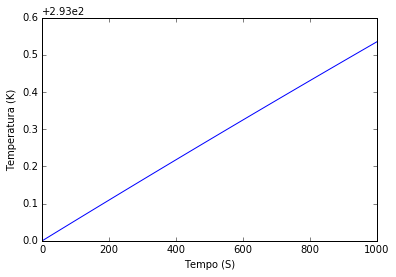

In [9]:
"""Verificação da função: cálculo de dTdt (em mov.) para um intervalo de Xs"""
from numpy import linspace
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

lista_tempo = linspace(0, 1000, 100)

T0 = Texterna = (20 + 273) #20°C para Kelvin

T = odeint(CalculaT_mov, T0, lista_tempo, args=(Texterna,))

print(T)

plt.plot(lista_tempo, T[:,0])
plt.xlabel("Tempo (S)")
plt.ylabel("Temperatura (K)")
plt.show()